# Modeling and Naive Bayes


```{important}
Remember to give [feedback on the course so far](https://forms.gle/g9ztHZaFSrmVnGTg8).  This feedback helps me make adjustments to the course if needed.  Even if things are good for you right now, letting me know helps me keep emphasis on the things that are helping.

The form requires you to be logged into you URI Google account, but does not share your e-mail with me in the results. It is required so that people not at URI do not complete the form. 
```


We're going to approach machine learning from the perspective of *modeling* for
a few reasons:
- model based machine learning streamlines understanding the big picture
- the model way of interpreting it aligns well with using sklearn
- thinking in terms of models aligns with incorporating domain expertise, as in our data science definition


this [paper](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/05/Bishop-MBML-2012.pdf) by Christopher M. Bishop, a senior ML researcher who also wrote one of a the widely preferred
graduate level ML textbooks, details advantages of a model based perspective and
a more mathematical version of a model based approach to machine learning. He is a co-author on an introductory text book [Model Based ML](https://mbmlbook.com/toc.html)

In CSC461: Machine Learning, you can encounter an *algorithm* focused approach
to machine learning, but I think having the model based perspective first helps
you avoid common pitfalls.

Remmeber our overview of ML:

![Ml overview: training data goes into the learning algorithm, which outputs the prediction algorithm. the prediciton algorithm takes a sampleand outputs a prediction](../img/MLdataflow.svg)

## What is a Model?

A model is a simplified representation of some part of the world. A famous quote about models is:


```{epigraph}
All models are wrong, but some are useful
--[George Box](https://en.wikipedia.org/wiki/All_models_are_wrong)[^wiki]
```

In machine learning, we use models, that are generally _statistical_ models.

A statistical model is a mathematical model that embodies a set of statistical assumptions concerning the generation of sample data (and similar data from a larger population). A statistical model represents, often in considerably idealized form, the data-generating process
[wikipedia](https://en.wikipedia.org/wiki/Statistical_model#:~:text=A%20statistical%20model%20is%20a,%2C%20the%20data%2Dgenerating%20process.)


read more in the[Model Based Machine Learning Book](http://www.mbmlbook.com/LearningSkills_A_model_is_a_set_of_assumptions.html)



## Models in Machine Learning

Starting from a dataset, we first make an additional designation about how we will use the different variables (columns). We will call most of them the _features_, which we denote mathematically with $\mathbf{X}$ and we'll choose one to be the _target_ or _labels_, denoted by $\mathbf{y}$.

The core assumption for just about all machine learning is that there exists some function $f$ so that for the $i$th sample

$$
  y_i = f(\mathbf{x}_i)
$$

$i$ would be the index of a DataFrame

Example models are (informally):
- we can describe the data as a set of blobs
- we can describe the rule to separate classes as a flow chart
- we can describe the rule to separate as a curved line


## Types of Machine Learning

Then with different additional assumptions we get different types of machine learning:
- if both features ($\mathbf{X}$) and target ($\mathbf{y}$) are observed (contained in our dataset) it's [__supervised learning__](https://en.wikipedia.org/wiki/Supervised_learning) [code](https://scikit-learn.org/stable/supervised_learning.html)
- if only the features ($\mathbf{X}$) are observed, it's [__unsupervised learning__](https://en.wikipedia.org/wiki/Unsupervised_learning) [code](https://scikit-learn.org/stable/unsupervised_learning.html)

<!--
```{mermaid}
flowchart TD
    fq{Do you have features?}
    sup[supervised learning]
    un[unsupervised learning]
    ml -- yes --> sup
 -->



## Supervised Learning

we'll focus on supervised learning first.  we can take that same core assumption and use it with additional information about our target variable to determine learning __task__ we are working to do.

$$
  y_i = f(\mathbf{x}_i)
$$

- if $y_i$ are discrete (eg flower species) we are doing __classification__
- if $y_i$ are continuous (eg height) we are doing __regression__


![flowchart for above definitions](../img/mltypes.svg)

```{admonition} Further Reading

[sklearn provides a popular flowchart](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) for choosing a specific model
```

## Machine Learning Pipeline

To do machine learning we start with __training data__ which we put as input to the __learning algorithm__. A learning algorithm might be a generic optimization procedure or a specialized procedure for a specific model. The learning algorithm outputs a trained __model__ or the parameters of the model. When we deploy a model we pair the __fit model__ with a __prediction algorithm__ or __decision__ algorithm to evaluate a new sample in the world.

In experimenting and design, we need __testing data__ to evaluate how well our learning algorithm understood the world.  We need to use previously unseen data, because if we don't we can't tell if the prediction algorithm is using a rule that the learning algorithm produced or just looking up from a lookup table the result.  This can be thought of like the difference between memorization and understanding.

When the model does well on the training data, but not on test data, we say that it does not generalize well.  

![data splits in ML; features, target, training and test](../img/mlsplits)


## Iris Dataset

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
iris_df = sns.load_dataset('iris')

We're trying to build an automatic flower classifier that, for measurements of a new flower returns the predicted species. To do this, we have a DataFrame with columns for species, petal width, petal length, sepal length, and sepal width. The species is what type of flower it is the petal and sepal are parts of the flower.

In [2]:
iris_df.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


We can look at this data using a pair plot. It plots each pair of numerical variables in a grid of scatterplots and on the diagonal (where it would be a variable with itself) shows the distribution of that variable.

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

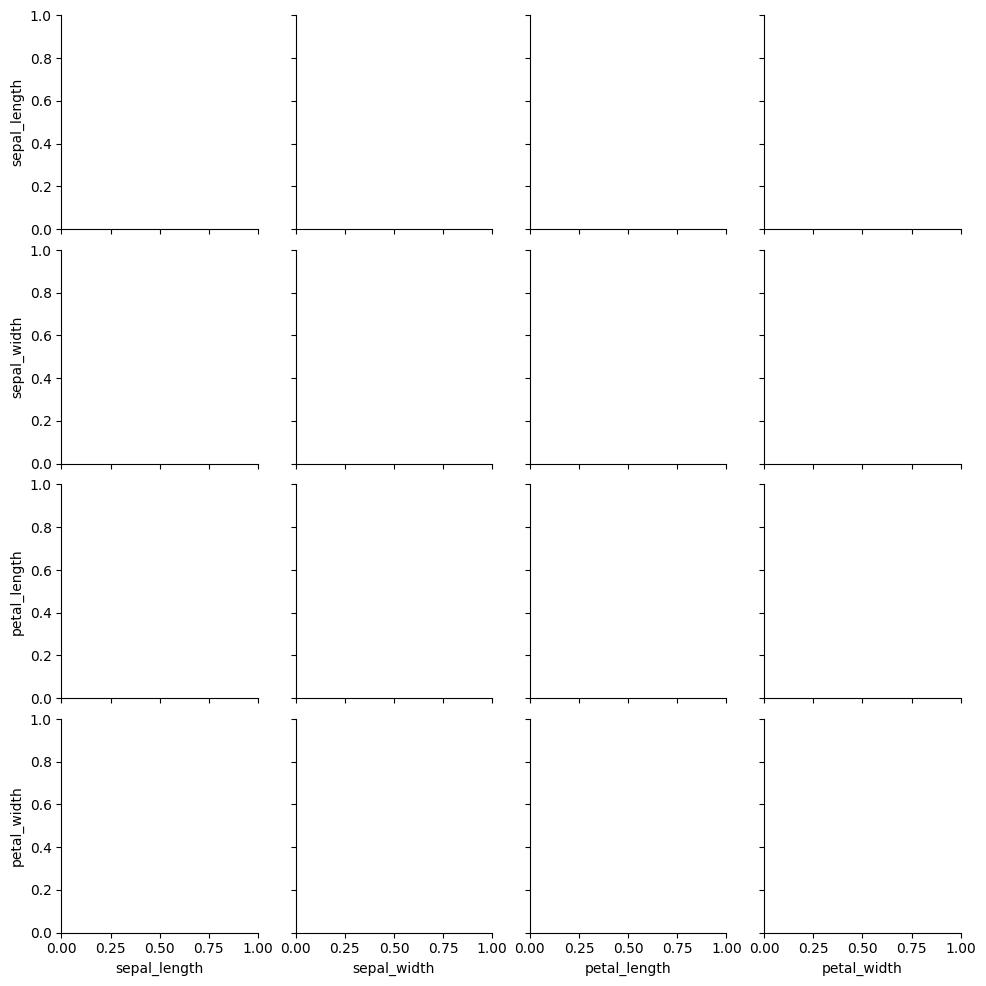

In [3]:
sns.pairplot(data=iris_df,hue='species')

This data is reasonably **separable** beacuse the different species (indicated with colors in the plot) do not overlap much.   We see that the features are distributed sort of like a normal, or Gaussian, distribution.  In 2D a Gaussian distribution is like a hill, so we expect to see more points near the center and fewer on the edge of circle-ish blobs.  These blobs are slightly live ovals, but not too skew.  


## Creating test and train

To do machine learning, we split the data both sample wise (rows if tidy) and variable-wise (columns if tidy). First, we'll designate the columns to use as features and as the target.  

The features are the input that we wish to use to predict the target.

In [4]:
feature_vars = ['sepal_length', 'sepal_width','petal_length', 'petal_width',]
target_var = 'species'

Next, we'll use a sklearn function to split the data randomly into test and train portions.
````{margin}
```{note}
Here i set the random state. This means that the site will always have the same result even when this notebook is run over and over again.  

Try downloading it (or adding `random_state` to your own code) and running it on your own computer.
```
````

In [5]:
X_train, X_test, y_train, y_test = train_test_split(iris_df[feature_vars],iris_df[target_var],random_state=0)

<!-- ```{code-cell} ipython3
xy_traintest = train_test_split(iris_df[feature_vars],iris_df[target_var])
```

```{code-cell} ipython3
def tts():
    return X_train, X_test,
```

```{code-cell} ipython3
type(xy_traintest)
```

```{code-cell} ipython3
xy_traintest[0].shape
```
-->

We can see by default how many samples it puts in each set

In [6]:
X_train.shape

(112, 4)

In [7]:
X_test.shape

(38, 4)

We can also see that it picks a random subset by the index:

In [8]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
61,5.9,3.0,4.2,1.5
92,5.8,2.6,4.0,1.2
112,6.8,3.0,5.5,2.1
2,4.7,3.2,1.3,0.2
141,6.9,3.1,5.1,2.3


## Instantiating our Model Object

This is the *model*.  In `sklearn` they call these objects [estimator](https://scikit-learn.org/stable/tutorial/statistical_inference/settings.html#estimators-objects). All estimators have a similar usage.  First we instantiate the object and set any *hyperparameters*.

Instantiating the object says we are assuming a particular type of model.  In this case [Gaussian Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html).  This sets several assumptions in one form:
- we assume data are Gaussian (normally) distributed
- the features are uncorrelated/independent (Naive)
- the best way to predict is to find the highest probability (Bayes)

this is one example of a [Bayes Estimator](https://en.wikipedia.org/wiki/Bayes_estimator)


````{margin}
```{admonition} Further Reading
_All of this is beyond the scope of this course, but may be of interest_
The Scikit Learn [User Guide](https://scikit-learn.org/stable/user_guide.html) is
 a really good place to learn the details of machine learning.  It is
high quality documentation from both a statistical and computer science
perspective of every element of the library.

The sklearn [API](https://scikit-learn.org/stable/modules/classes.html) describes
how the library is structured and organized. Because the library is so popular
(and it's pretty well architected from a software perspective as well) if you
are developing new machine learning techniques it's good to make them sklearn
compatible.  

For example, IBM's [AIF360](https://aif360.readthedocs.io/en/latest/index.html) is a package for doing fair machine learning which has a
[sklearn compatible interface(https://aif360.readthedocs.io/en/latest/modules/sklearn.html). Scikit Learn documentation also includes a
[related projects](https://scikit-learn.org/stable/related_projects.html) page.
```
````

In [9]:
gnb = GaussianNB()

At this point the object is not very interesting

In [10]:
gnb.__dict__

{'priors': None, 'var_smoothing': 1e-09}

The fit method uses the data to learn the model's parameters.  In this case, a Gaussian distribution is characterized by  a mean and variance; so the GNB classifier is characterized by one mean and one variance for each class (in 4d, like our data)

In [11]:
gnb.fit(X_train,y_train)

GaussianNB()

The attributes of the [estimator object](https://scikit-learn.org/stable/glossary.html#term-estimators) (`gbn`) describe the data (eg the class list) and the model's parameters. The `theta_` ($\theta$)
represents the mean and the `sigma_` ($\sigma$) represents the variance of the
distributions.

In [12]:
gnb.__dict__

{'priors': None,
 'var_smoothing': 1e-09,
 'classes_': array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
 'feature_names_in_': array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
       dtype=object),
 'n_features_in_': 4,
 'epsilon_': 3.2135586734693885e-09,
 'theta_': array([[4.9972973 , 3.38918919, 1.45405405, 0.24054054],
        [5.91764706, 2.75882353, 4.19117647, 1.30882353],
        [6.66341463, 2.9902439 , 5.58292683, 2.03902439]]),
 'var_': array([[0.12242513, 0.14474799, 0.01978087, 0.01159971],
        [0.2649827 , 0.11124568, 0.22139274, 0.0408045 ],
        [0.4071981 , 0.11453897, 0.30483046, 0.06579417]]),
 'class_count_': array([37., 34., 41.]),
 'class_prior_': array([0.33035714, 0.30357143, 0.36607143])}

Once we fit, we can predict

In [13]:
y_pred = gnb.predict(X_test)
y_pred

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'versicolor'], dtype='<U10')

we get one prediciton for each sample.

Estimator objects also have a score method.  If the estimator is a classifier, that score is accuracy.  We will see that for other types of estimators it is different types.

In [14]:
gnb.score(X_test,y_test)

1.0

We can also compute a confusion matrix as we did last week (see those notes).  Now it is 3x3 though because we have 3 species instead of two outcomes like the COMPAS predictions.

In [15]:
confusion_matrix(y_test,y_pred)

array([[13,  0,  0],
       [ 0, 16,  0],
       [ 0,  0,  9]])

## Questions After Class

#### is there any extra material where we can learn a better understanding oh how to do the predictions and models
The Scikit Learn [User Guide](https://scikit-learn.org/stable/user_guide.html) is a good place, as is the [Model Based ML](https://mbmlbook.com/toc.html)

### Are there any good introductions to ScikitLearn that you are aware of?

Scikit Learn [User Guide](https://scikit-learn.org/stable/user_guide.html) is the best one and they have a large example gallery.

### What is a confusion matrix?

Notes from [last wed](https://rhodyprog4ds.github.io/BrownFall22/notes/2022-10-12.html#performance-metrics-in-sklearn) go over that.


### Can you use machine learning for any type of data?

Yes the features for example could be an image instead of four numbers.  It could also be text.  The basic ideas are the same for more complex data, so we are going to spend a lot of time building your understanding of what ML *is* on simple data. Past students have successfully applied ML in more complex data after this course because once you have a good understanding of the core ideas, applying it to other forms of data is easier to learn on your own.

### Can we check how well the model did using the y_test df?
we could compare them directly or using `score` that does.

In [16]:
y_pred == y_test

114    True
62     True
33     True
107    True
7      True
100    True
40     True
86     True
76     True
71     True
134    True
51     True
73     True
54     True
63     True
37     True
78     True
90     True
45     True
16     True
121    True
66     True
24     True
8      True
126    True
22     True
44     True
97     True
93     True
26     True
137    True
84     True
27     True
127    True
132    True
59     True
18     True
83     True
Name: species, dtype: bool

In [17]:
sum(y_pred == y_test)/len(y_test)

1.0

In [18]:
gnb.score(X_test,y_test)

1.0

We can also use any of the other metrics we saw, we'll practice more on Wednesday

### I want to know more about the the test_train_split() function

[the docs](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) are a good place to start.

### Could we use the comparison stuff we've been learning to test the ML algorithm?

Yes!!

### How should we set the random set we had for x_test to a specific group?

the [`random_state`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#:~:text=the%20test%20size.-,random_state,-int%2C%20RandomState%20instance) parameter will fix it.

```{note}
If I misunderstood this question, post an issue
```

### Not a question but we're using the iris dataset in my programming with R class too!

The iris dataset is a very popular easy to use dataset.  It is good for this case because it fits the criteria of a simple classifier.  It comes from the [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php) a large collection of good datasets for machine learning, you can learn more about it [on its page there](https://archive.ics.uci.edu/ml/datasets/iris).